In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# raw data pulled from the VSCS dashboard with the pivot table expanded to include the following columns:
# Offense Group: high level offense category (ASSAULT, ROBBERY, etc.)
# VCC: the offense code
# FiscalYr: the fiscal year in which the offender was sentenced
# ActDisp: sentencing disposition, type 2 indicates County Jail 3 indicates State Prison
# Category: 0, 1, 2, or 9 representing the crime severity (Category 1 and 2 are violent)
# effsent: the effective sentence in months
# Number of Events: number of sentencing events in this group

#raw_va_sentence_df = pd.read_csv('VA_data/unprocessed_va_historical_sentences.csv', sep='\t')

raw_va_sentence_df = pd.read_csv('../state/VA/VA_data/unprocessed_va_historical_sentences_v2.csv', sep='\t')

raw_va_sentence_df['offense_group'] = raw_va_sentence_df['Offense Group'].ffill()
raw_va_sentence_df['offense_code'] = raw_va_sentence_df['VCC'].ffill()
raw_va_sentence_df['off1_vcc'] = raw_va_sentence_df['Off1VCC'].ffill()
raw_va_sentence_df['judge_id'] = raw_va_sentence_df['JudgeID'].ffill()
raw_va_sentence_df['sentence_type_code'] = raw_va_sentence_df['ActDisp'].ffill()
raw_va_sentence_df['year'] = raw_va_sentence_df['FiscalYr'].ffill()
raw_va_sentence_df['effective_sentence_months'] = raw_va_sentence_df['effsent']
raw_va_sentence_df['effective_sentence_years'] = raw_va_sentence_df['effective_sentence_months']/12.0
raw_va_sentence_df['life_sentence'] = raw_va_sentence_df['EffLif']
raw_va_sentence_df['offense_date'] = raw_va_sentence_df['Off1Date']
raw_va_sentence_df['compartment'] = 'pretrial'

raw_va_sentence_df = raw_va_sentence_df[~raw_va_sentence_df['offense_group'].str.contains('Total')]

# convert the ActDisp numerical value into an incarceration type flag
act_disp_dict = {1: 'probation', 2: 'jail', 3: 'prison'}
raw_va_sentence_df['sentence_type'] = raw_va_sentence_df['sentence_type_code'].apply(lambda x: act_disp_dict[x])

# convert the offense category into violent/non-violent
# offence_category_dict = {0: 'non-violent', 1: 'violent', 2: 'violent', 9: 'non-violent'}
# raw_va_sentence_df['offense_category'] = raw_va_sentence_df['offense_category_code'].apply(
#     lambda x: offence_category_dict[x]
# )

# drop extra columns
raw_va_sentence_df = raw_va_sentence_df.drop(
    ['Offense Group', 'VCC', 'FiscalYr', 'ActDisp', 'effsent', 'JudgeID', 'sentence_type_code', 'Off1VCC', 'EffLif',
     'Off1Date'], 
    axis=1
)

print(len(raw_va_sentence_df))
raw_va_sentence_df.head()

74302


,OffLName,OffFName,offense_group,offense_code,off1_vcc,judge_id,year,effective_sentence_months,effective_sentence_years,life_sentence,offense_date,compartment,sentence_type
0,MOORE,KENNETH,ASSAULT,ASL1316,ASL1316F6,0,2018.0,18.0,1.500000,0.0,5/20/2017,pretrial,prison
1,CLINE,MATTHEW,ASSAULT,ASL1316,ASL1316F6,0,2019.0,10.0,0.833333,0.0,4/25/2018,pretrial,prison
2,TINSLEY,JAVON,ASSAULT,ASL1316,ASL1316F6,10DB,2018.0,0.0,0.000000,0.0,11/11/2017,pretrial,probation
3,COMPTON,ROBERT,ASSAULT,ASL1316,ASL1316F6,10DB,2017.0,0.0,0.000000,0.0,6/8/2015,pretrial,jail
4,MILLER,MARCUS,ASSAULT,ASL1316,ASL1316F6,10DB,2017.0,7.0,0.583333,0.0,12/25/2016,pretrial,prison


In [3]:
va_sentence_df = raw_va_sentence_df.drop(['OffLName', 'OffFName'], axis=1)
va_sentence_df.head()

,offense_group,offense_code,off1_vcc,judge_id,year,effective_sentence_months,effective_sentence_years,life_sentence,offense_date,compartment,sentence_type
0,ASSAULT,ASL1316,ASL1316F6,0,2018.0,18.0,1.500000,0.0,5/20/2017,pretrial,prison
1,ASSAULT,ASL1316,ASL1316F6,0,2019.0,10.0,0.833333,0.0,4/25/2018,pretrial,prison
2,ASSAULT,ASL1316,ASL1316F6,10DB,2018.0,0.0,0.000000,0.0,11/11/2017,pretrial,probation
3,ASSAULT,ASL1316,ASL1316F6,10DB,2017.0,0.0,0.000000,0.0,6/8/2015,pretrial,jail
4,ASSAULT,ASL1316,ASL1316F6,10DB,2017.0,7.0,0.583333,0.0,12/25/2016,pretrial,prison


In [4]:
va_sentence_df['offense_group'].value_counts(dropna=False)

DRUG/SCHEDULE I/II        28433
LARCENY                   14966
FRAUD                      5285
ASSAULT                    4848
TRAFFIC FELONY             4649
DRUG OTHER                 3096
WEAPONS/FIREARMS           2523
BURGLARY/DWELLING          1899
ROBBERY                    1621
MISC/PERSON & PROPERTY     1416
MISC_OTHER                 1253
BURGLARY/OTHER             1022
OTHER SEXUAL ASSAULT        966
MURDER                      762
OBSCENITY                   649
RAPE                        523
KIDNAPPING                  391
Name: offense_group, dtype: int64

In [5]:
va_sentence_df['year'].value_counts(dropna=False)

2019.0    24990
2017.0    24666
2018.0    24646
Name: year, dtype: int64

In [6]:
raw_va_sentence_df['life_sentence'].value_counts(dropna=False)

0.0    72661
NaN     1528
1.0      113
Name: life_sentence, dtype: int64

In [7]:
raw_va_sentence_df[raw_va_sentence_df['life_sentence'] == 1]['offense_group'].value_counts(dropna=False)

MURDER        65
RAPE          42
ASSAULT        4
KIDNAPPING     1
OBSCENITY      1
Name: offense_group, dtype: int64

In [8]:
# store the processed dataframe as a csv
raw_va_sentence_df.to_csv('VA_data/processed_va_historical_sentences_v2.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'VA_data/processed_va_historical_sentences_v2.csv'

In [9]:
raw_va_sentence_df[(raw_va_sentence_df[['OffFName', 'OffLName', 'Off1Date']].duplicated())]

KeyError: "['Off1Date'] not in index"

In [10]:
raw_va_sentence_df[(raw_va_sentence_df['OffFName'] == 'RAYMOND') & (raw_va_sentence_df['OffLName'] == 'JOHNSON')]

,OffLName,OffFName,offense_group,offense_code,off1_vcc,judge_id,year,effective_sentence_months,effective_sentence_years,life_sentence,offense_date,compartment,sentence_type
3206,JOHNSON,RAYMOND,ASSAULT,ASL1342,ASL1342F6,15HH,2017.0,13.000000,1.083333,0.0,11/12/2016,pretrial,prison
3209,JOHNSON,RAYMOND,ASSAULT,ASL1342,ASL1342F6,15HH,2018.0,8.000000,0.666667,0.0,11/12/2016,pretrial,prison
12338,JOHNSON,RAYMOND,DRUG/SCHEDULE I/II,NAR3022,NAR3022F5,12TH,2017.0,0.000000,0.000000,0.0,5/26/2016,pretrial,probation
15059,JOHNSON,RAYMOND,DRUG/SCHEDULE I/II,NAR3022,NAR3022F5,15JOH,2019.0,0.000000,0.000000,0.0,1/26/2008,pretrial,probation
34516,JOHNSON,RAYMOND,DRUG/SCHEDULE I/II,NAR3043,NAR3043F9,17DF,2019.0,16.000000,1.333333,0.0,3/14/2018,pretrial,prison
68258,JOHNSON,RAYMOND,TRAFFIC FELONY,DWI5450,DWI5450F6,16SW,2017.0,14.956879,1.246407,0.0,7/30/2016,pretrial,prison


In [11]:
# store the processed dataframe as a csv
va_sentence_df.to_csv('VA_data/processed_va_historical_sentences.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'VA_data/processed_va_historical_sentences.csv'

In [12]:
va_sentence_df['sentence_type'].value_counts(dropna=False)

prison       34740
jail         21437
probation    18125
Name: sentence_type, dtype: int64

In [13]:
va_sentence_df['year'].value_counts(dropna=False)

2019.0    24990
2017.0    24666
2018.0    24646
Name: year, dtype: int64

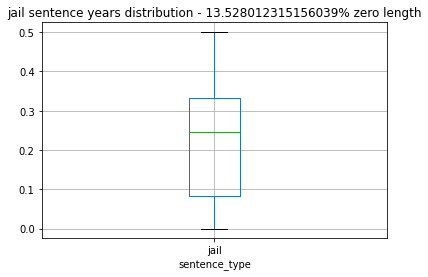

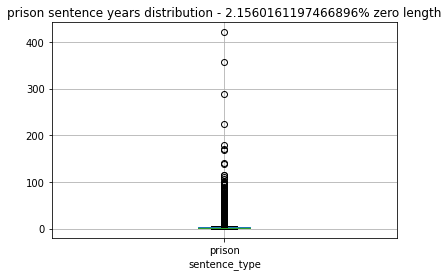

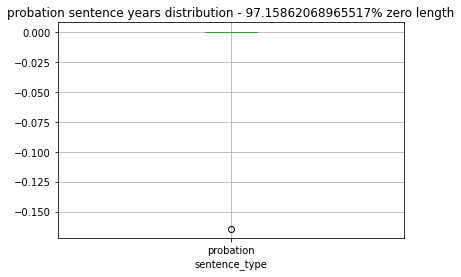

In [14]:
for sentence_type, sentence_group in va_sentence_df.groupby('sentence_type'):
    sentence_group.boxplot(column='effective_sentence_years', by='sentence_type')
    percent_zero_sentence = 100 * sum(sentence_group['effective_sentence_months'] == 0)/len(sentence_group)
    plt.suptitle('')
    plt.title(f'{sentence_type} sentence years distribution - {percent_zero_sentence}% zero length')

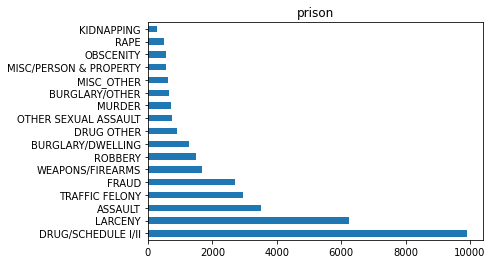

In [15]:
for sentence_type, sentence_group in va_sentence_df.groupby('sentence_type'):
    if sentence_type == 'probation':
        continue
    sentence_group['offense_group'].value_counts().plot.barh(ax=None)
    plt.title(sentence_type)

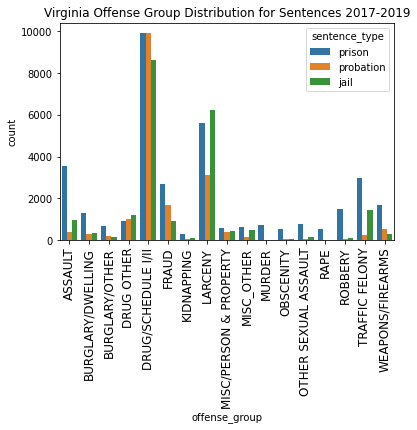

In [16]:
# Offense Group Options
offense_group_chart = sns.countplot(data=va_sentence_df, x='offense_group',hue='sentence_type')
offense_group_chart.set_title('Virginia Offense Group Distribution for Sentences 2017-2019')
chart_axis_label = offense_group_chart.set_xticklabels(offense_group_chart.get_xticklabels(), rotation=90, 
                                                       fontsize='large')

In [17]:
va_sentence_df[va_sentence_df['sentence_type'] == 'probation']['effective_sentence_months'].describe()

count    17611.000000
mean        -0.000112
std          0.014854
min         -1.971253
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: effective_sentence_months, dtype: float64

In [18]:
va_sentence_df[va_sentence_df['sentence_type'] == 'jail']['effective_sentence_months'].describe()

count    21344.000000
mean         2.595771
std          2.090384
min          0.000000
25%          0.985626
50%          2.956879
75%          4.000000
max          6.000000
Name: effective_sentence_months, dtype: float64

In [19]:
va_sentence_df[va_sentence_df['sentence_type'] == 'prison']['effective_sentence_months'].describe()

count    34596.000000
mean        38.463570
std         84.816284
min          0.000000
25%         12.000000
50%         18.000000
75%         36.000000
max       5052.000000
Name: effective_sentence_months, dtype: float64

In [20]:
prison_df = va_sentence_df[va_sentence_df['sentence_type'] == 'prison']
prison_df

,offense_group,offense_code,off1_vcc,judge_id,year,effective_sentence_months,effective_sentence_years,life_sentence,offense_date,compartment,sentence_type
0,ASSAULT,ASL1316,ASL1316F6,0,2018.0,18.0,1.500000,0.0,5/20/2017,pretrial,prison
1,ASSAULT,ASL1316,ASL1316F6,0,2019.0,10.0,0.833333,0.0,4/25/2018,pretrial,prison
4,ASSAULT,ASL1316,ASL1316F6,10DB,2017.0,7.0,0.583333,0.0,12/25/2016,pretrial,prison
5,ASSAULT,ASL1316,ASL1316F6,10DB,2019.0,7.0,0.583333,0.0,11/17/2018,pretrial,prison
7,ASSAULT,ASL1316,ASL1316F6,10KW,2017.0,14.0,1.166667,0.0,12/11/2016,pretrial,prison
...,...,...,...,...,...,...,...,...,...,...,...
74312,WEAPONS/FIREARMS,WPN5298,WPN5298F6,9JS,2018.0,60.0,5.000000,0.0,8/29/2017,pretrial,prison
74313,WEAPONS/FIREARMS,WPN5298,WPN5298F6,9MM,2018.0,8.0,0.666667,0.0,6/1/2017,pretrial,prison
74314,WEAPONS/FIREARMS,WPN5298,WPN5298F6,9MM,2018.0,13.0,1.083333,0.0,6/27/2017,pretrial,prison
74315,WEAPONS/FIREARMS,WPN5298,WPN5298F6,9MM,2019.0,7.0,0.583333,0.0,11/30/2017,pretrial,prison


In [21]:
# look into offense groups that could potentially be merged based on similar sentence lengths
prison_df[['offense_group', 'offense_category', 'effective_sentence_months']]\
.groupby(['offense_group', 'offense_category'], as_index=False).agg(
{'effective_sentence_months': ['mean', 'count']}
).sort_values(by=['offense_category', ('effective_sentence_months', 'mean')])

KeyError: "['offense_category'] not in index"

In [22]:
va_sentence_df[va_sentence_df['offense_group'] == 'ROBBERY'].groupby(['sentence_type', 'offense_category']).count()

KeyError: 'offense_category'

In [23]:
va_sentence_df.groupby(['sentence_type']).count()

,offense_group,offense_code,off1_vcc,judge_id,year,effective_sentence_months,effective_sentence_years,life_sentence,offense_date,compartment
sentence_type,,,,,,,,,,
jail,21437,21437,21437,21437,21437,21344,21344,21071,21064,21437
prison,34740,34740,34740,34740,34740,34596,34596,34092,34077,34740
probation,18125,18125,18125,18125,18125,17611,17611,17611,17606,18125


In [24]:
for offense_type, offense_group in prison_df.groupby('offense_group'):
    offense_group.boxplot(column='effective_sentence_years', by='offense_category_code')
    plt.title(f'Effective Prison Sentence years for {offense_type} - {len(offense_group)} sentences min sentence {min_sentence} months')
    plt.suptitle('')
    plt.ylabel('Effective Sentence Years')

KeyError: 'offense_category_code'

1394


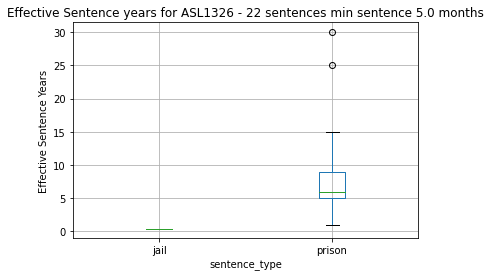

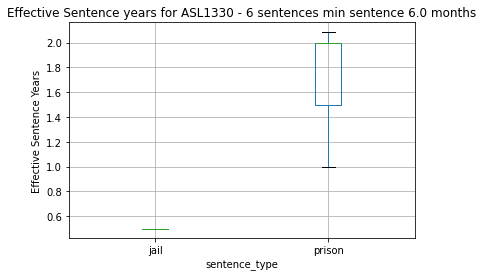

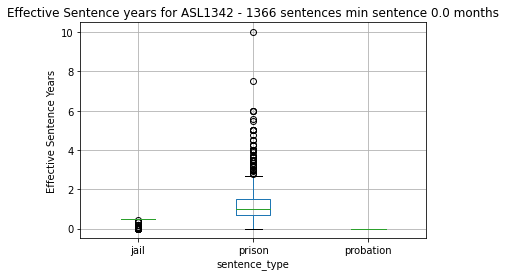

In [25]:
# Distribution of Offenses related to Assault on Law Enforcement 
law_enforcement_offenses = ['ASL1326', 'ASL1330', 'ASL1342']
law_enforcement_assault = va_sentence_df[va_sentence_df['offense_code'].isin(law_enforcement_offenses)]
print(len(law_enforcement_assault))
for offense_code, group in law_enforcement_assault.groupby('offense_code'):
    group.boxplot(column='effective_sentence_years', by='sentence_type')
    min_sentence = min(group['effective_sentence_months'])
    plt.title(f'Effective Sentence years for {offense_code} - {len(group)} sentences min sentence {min_sentence} months')
    plt.suptitle('')
    plt.ylabel('Effective Sentence Years')

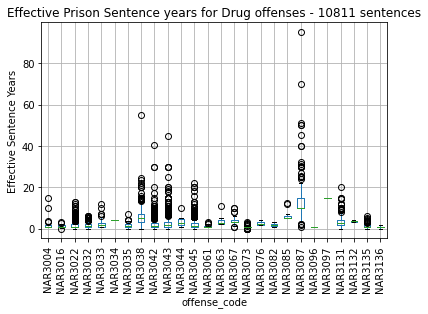

In [26]:
drug_offense_groups = ['DRUG/SCHEDULE I/II', 'DRUG OTHER']
drug_prison_offenses = va_sentence_df[(va_sentence_df['sentence_type'] == 'prison') 
                                      & (va_sentence_df['offense_group'].isin(drug_offense_groups))]
drug_prison_offenses.boxplot(column='effective_sentence_years', by='offense_code')
plt.title(f'Effective Prison Sentence years for Drug offenses - {len(drug_prison_offenses)} sentences')
plt.suptitle('')
plt.ylabel('Effective Sentence Years')
x_ticks = plt.xticks(rotation=90)

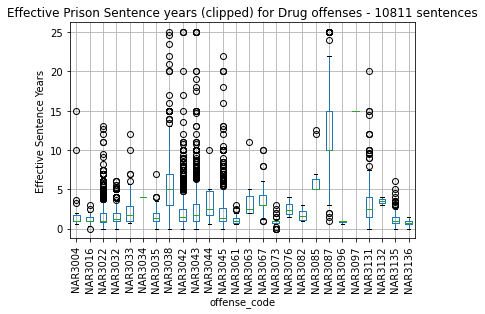

In [27]:
drug_offense_groups = ['DRUG/SCHEDULE I/II', 'DRUG OTHER']
va_sentence_df['effective_sentence_years_clipped'] = np.clip(va_sentence_df['effective_sentence_years'], 0, 25)
drug_prison_offenses = va_sentence_df[(va_sentence_df['sentence_type'] == 'prison') 
                                      & (va_sentence_df['offense_group'].isin(drug_offense_groups))]
drug_prison_offenses.boxplot(column='effective_sentence_years_clipped', by='offense_code')
plt.title(f'Effective Prison Sentence years (clipped) for Drug offenses - {len(drug_prison_offenses)} sentences')
plt.suptitle('')
plt.ylabel('Effective Sentence Years')
x_ticks = plt.xticks(rotation=90)

In [28]:
drug_offense_counts = pd.DataFrame()
for offense_code, group in drug_prison_offenses.groupby('offense_code'):
    min_sentence = min(group['effective_sentence_months'])
    num_min_sentence = sum(group['effective_sentence_months'] == min_sentence)
    drug_offense_counts.loc[offense_code, 'minimum_sentence'] = min_sentence
    drug_offense_counts.loc[offense_code, 'num_min_sentences'] = num_min_sentence
    drug_offense_counts.loc[offense_code, 'total_sentences'] = len(group)
drug_offense_counts.sort_values(by='total_sentences', ascending=False)

,minimum_sentence,num_min_sentences,total_sentences
NAR3022,0.0,128.0,2885.0
NAR3043,0.0,44.0,2090.0
NAR3042,0.0,65.0,2088.0
NAR3045,0.0,48.0,1369.0
NAR3038,0.0,1.0,702.0
NAR3032,0.0,9.0,365.0
NAR3131,0.0,4.0,282.0
NAR3135,0.0,12.0,280.0
NAR3087,12.0,1.0,184.0
NAR3035,0.0,6.0,184.0


In [29]:
print("Zero month prison sentences:", sum(drug_prison_offenses['effective_sentence_months'] == 0),
      100 * sum(drug_prison_offenses['effective_sentence_months'] == 0)/len(drug_prison_offenses))
print("Less than 1 year prison sentences:", sum(drug_prison_offenses['effective_sentence_months'] < 12),
      100 * sum(drug_prison_offenses['effective_sentence_months'] < 12)/len(drug_prison_offenses))

Zero month prison sentences: 326 3.0154472296734807
Less than 1 year prison sentences: 2478 22.921098880769588


In [30]:
prison_df.head()

,offense_group,offense_code,off1_vcc,judge_id,year,effective_sentence_months,effective_sentence_years,life_sentence,offense_date,compartment,sentence_type
0,ASSAULT,ASL1316,ASL1316F6,0,2018.0,18.0,1.500000,0.0,5/20/2017,pretrial,prison
1,ASSAULT,ASL1316,ASL1316F6,0,2019.0,10.0,0.833333,0.0,4/25/2018,pretrial,prison
4,ASSAULT,ASL1316,ASL1316F6,10DB,2017.0,7.0,0.583333,0.0,12/25/2016,pretrial,prison
5,ASSAULT,ASL1316,ASL1316F6,10DB,2019.0,7.0,0.583333,0.0,11/17/2018,pretrial,prison
7,ASSAULT,ASL1316,ASL1316F6,10KW,2017.0,14.0,1.166667,0.0,12/11/2016,pretrial,prison


In [31]:
vcc_groups = prison_df.groupby(['offense_group', 'offense_code'], 
                               as_index=False).agg({'offense_category_code': 'count',
                                                    'effective_sentence_years': ['min', 'max']})
vcc_groups.to_csv('va_offense_vcc_data.csv', index=False)
vcc_groups.head()

KeyError: "Column 'offense_category_code' does not exist!"

In [ ]:
# Offense Group Options
offense_group_chart = sns.countplot(data=prison_df, x='offense_group',hue='year')
offense_group_chart.set_title('VA Offense Group Distribution for Prison Sentences 2017-2019')
chart_axis_label = offense_group_chart.set_xticklabels(offense_group_chart.get_xticklabels(), rotation=90, 
                                                       fontsize='large')

In [ ]:
prison_df['rounded_capped_effective_sentence_years'] = \
    np.clip(np.ceil(prison_df['effective_sentence_years']), 0, 25).astype(int)
for index, (offense_group, group) in enumerate(prison_df.groupby('offense_group')):
    plt.figure(index)
    offense_group_chart = sns.countplot(data=group, x='rounded_capped_effective_sentence_years', hue='year')
    offense_group_chart.set_title(f'{offense_group} Sentence Length Distribution for VA Sentences 2017-2019')


/Users/pacopoler/.local/share/virtualenvs/recidiviz-research-LWZgHH0n/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/pacopoler/.local/share/virtualenvs/recidiviz-research-LWZgHH0n/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/pacopoler/.local/share/virtualenvs/recidiviz-research-LWZgHH0n/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

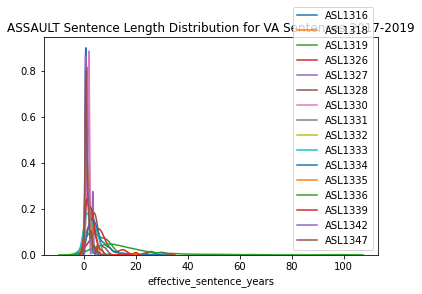

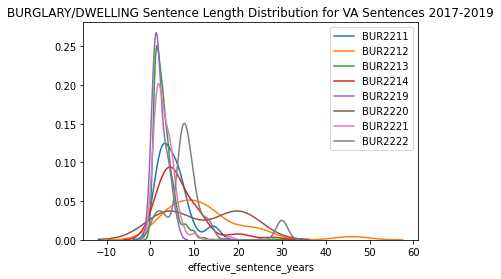

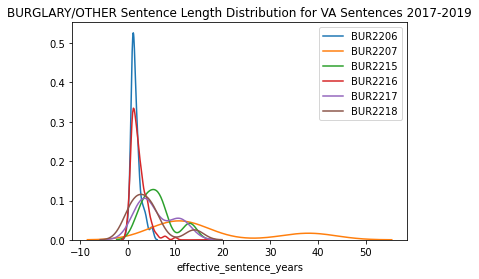

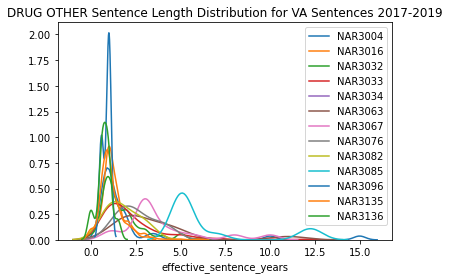

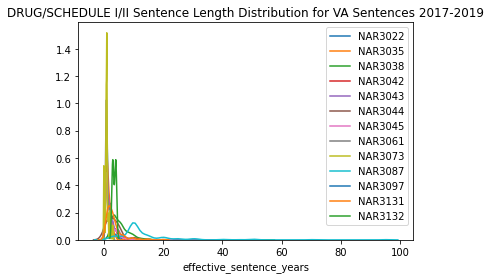

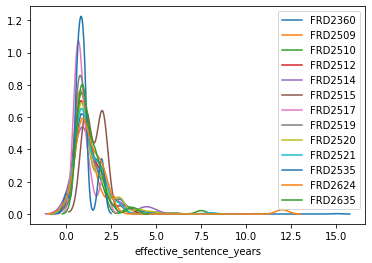

In [32]:
for index, (offense_group, group) in enumerate(prison_df.groupby('offense_group')):
    plt.figure(index)
    ax = None
    for vcc, vcc_group in group.groupby('offense_code'):
        ax = offense_group_chart = sns.distplot(vcc_group['effective_sentence_years'], label=vcc, ax=ax, hist=False)
    #plt.ylim([0, 1])
    offense_group_chart.set_title(f'{offense_group} Sentence Length Distribution for VA Sentences 2017-2019')


In [ ]:
va_mm_offenses = {
    'ASL1342': 0.5,
    'NAR3063': 2,
    'NAR3067': 3,
    'NAR3085': 5,
    'NAR3038': 3,
    'NAR3087': 10,
    'NAR3097': 5,
    'ESC4921': 1,
    'MUR0948': 1,
    'DWI5406': 1,
    'DWI5449': 0.25,
    'DWI5450': 0.5,
    'DWI5680': 0.5,
    'DWI5681': 0.5,
    'DWI5682': 0.25,
    'DWI5683': 0.25,
    'DWI5688': 1,
    'DWI5689': 1,
    'LIC6832': 1,
    'LIC6834': 1,
    'LIC6848': 1,
    'LIC6859': 1,
    'LIC6860': 1,
    'LIC6861': 1,
    'WPN5296': 5,
    'WPN5297': 2,
}
print(len(va_mm_offenses))

In [ ]:
mm_sentences = pd.DataFrame()
for index, (offense_code, mm_years) in enumerate(va_mm_offenses.items()):
    total_group = va_sentence_df[va_sentence_df['offense_code'] == offense_code]
    inc_group = total_group[total_group['sentence_type'] != 'probation']
    
    mm_sentences.loc[index, 'offense_code'] = offense_code
    mm_sentences.loc[index, 'mandatory_minimum_years'] = mm_years
    
    mm_sentences.loc[index, 'total_sentences'] = len(total_group)
    mm_sentences.loc[index, 'total_incarceration_sentences'] = len(inc_group)
    
    mm_sentences.loc[index, 'mean_sentence_length'] = inc_group['effective_sentence_years'].mean()
    mm_sentences.loc[index, 'median_sentence_length'] = inc_group['effective_sentence_years'].median()
    
    mm_sentences.loc[index, 'total_sentenced_to_mm'] = sum(inc_group['effective_sentence_years'] == mm_years)
    mm_sentences.loc[index, 'pct_sentenced_to_mm'] = sum(inc_group['effective_sentence_years'] == mm_years)/len(inc_group)
    
    mm_sentences.loc[index, 'total_sentenced_below_mm'] = sum(inc_group['effective_sentence_years'] < mm_years)
    mm_sentences.loc[index, 'pct_sentenced_below_mm'] = sum(inc_group['effective_sentence_years'] < mm_years)/len(inc_group)
    
    mm_sentences.loc[index, 'number_of_0_month_sentences'] = sum(inc_group['effective_sentence_years'] == 0)
    mm_sentences.loc[index, 'min_non_zero_sentence_length'] = min(inc_group[inc_group['effective_sentence_years'] > 0]['effective_sentence_years'])
    mm_sentences.loc[index, 'min_non_zero_sentence_length_months'] = min(inc_group[inc_group['effective_sentence_years'] > 0]['effective_sentence_months'])

    
mm_sentences

In [ ]:
offense_code = 'NAR3087'
mm_years = 10
#group = prison_df[prison_df['offense_code'] == offense_code]
group = va_sentence_df[(va_sentence_df['offense_code'] == offense_code) 
                       & (va_sentence_df['sentence_type'] != 'probation')
                      ]
print(group['sentence_type'].value_counts(dropna=False))
percent_below = 100 * sum(group['effective_sentence_years'] < mm_years)/len(group)
print(f"{100 * sum(group['effective_sentence_years'] < mm_years)/len(group):.2f}% below the Manditory Minimum")
print(f"Mean sentence length: {group['effective_sentence_years'].mean():.2f}")
print(f"Median sentence length: {group['effective_sentence_years'].median():.2f}")
ax = sns.distplot(group['effective_sentence_years'])
plt.suptitle(f'{offense_code} Sentence Distribution - {mm_years}Y MM')
plt.title(f"{percent_below:.0f}% sentences below MM ({sum(group['effective_sentence_years'] < mm_years)} of {len(group)})")
ymin, ymax = ax.get_ylim()
#plt.vlines(x=mm_years, ymin=ymin, ymax=ymax, color='red')

In [ ]:
offense_code = 'NAR3038'
mm_years = 3
#group = prison_df[prison_df['offense_code'] == offense_code]
group = va_sentence_df[(va_sentence_df['offense_code'] == offense_code) 
                       & (va_sentence_df['sentence_type'] != 'probation')
                      ]
print(group['sentence_type'].value_counts(dropna=False))
percent_below = 100 * sum(group['effective_sentence_years'] < mm_years)/len(group)
print(f"{percent_below:.2f}% below the Manditory Minimum")
print(f"Mean sentence length: {group['effective_sentence_years'].mean():.2f}")
print(f"Median sentence length: {group['effective_sentence_years'].median():.2f}")
ax = sns.distplot(group['effective_sentence_years'])
title = plt.suptitle(f'{offense_code} Sentence Distribution - {mm_years}Y MM')
plt.title(f"{percent_below:.0f}% sentences below MM ({sum(group['effective_sentence_years'] < mm_years)} of {len(group)})")
ymin, ymax = ax.get_ylim()
#plt.vlines(x=mm_years, ymin=ymin, ymax=ymax, color='red')

In [ ]:
offense_code = 'NAR3043'
#group = prison_df[prison_df['offense_code'] == offense_code]
group = va_sentence_df[(va_sentence_df['offense_code'] == offense_code) 
                       & (va_sentence_df['sentence_type'] != 'probation')
                      ]
print(group['sentence_type'].value_counts(dropna=False))
ax = sns.distplot(group['effective_sentence_years'])
print(f"Mean sentence length: {group['effective_sentence_years'].mean():.2f}")
print(f"Median sentence length: {group['effective_sentence_years'].median():.2f}")
title = plt.suptitle(f'{offense_code} Sentence Distribution')
plt.title(f"{len(group)} Total Sentences")
ymin, ymax = ax.get_ylim()
#plt.vlines(x=mm_years, ymin=ymin, ymax=ymax, color='red')

prison    1369
jail       145
Name: sentence_type, dtype: int64
Mean sentence length: 1.91
Median sentence length: 1.25


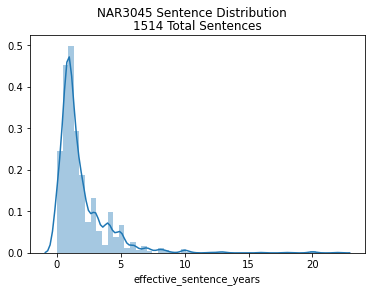

In [33]:
offense_code = 'NAR3045'
#group = prison_df[prison_df['offense_code'] == offense_code]
group = va_sentence_df[(va_sentence_df['offense_code'] == offense_code) 
                       & (va_sentence_df['sentence_type'] != 'probation')
                      ]
print(group['sentence_type'].value_counts(dropna=False))
ax = sns.distplot(group['effective_sentence_years'])
print(f"Mean sentence length: {group['effective_sentence_years'].mean():.2f}")
print(f"Median sentence length: {group['effective_sentence_years'].median():.2f}")
title = plt.suptitle(f'{offense_code} Sentence Distribution')
plt.title(f"{len(group)} Total Sentences")
ymin, ymax = ax.get_ylim()
#plt.vlines(x=mm_years, ymin=ymin, ymax=ymax, color='red')

prison    2088
jail       198
Name: sentence_type, dtype: int64
Mean sentence length: 1.91
Median sentence length: 1.25


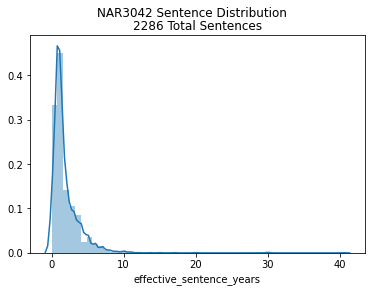

In [34]:
offense_code = 'NAR3042'
#group = prison_df[prison_df['offense_code'] == offense_code]
group = va_sentence_df[(va_sentence_df['offense_code'] == offense_code) 
                       & (va_sentence_df['sentence_type'] != 'probation')
                      ]
print(group['sentence_type'].value_counts(dropna=False))
ax = sns.distplot(group['effective_sentence_years'])
print(f"Mean sentence length: {group['effective_sentence_years'].mean():.2f}")
print(f"Median sentence length: {group['effective_sentence_years'].median():.2f}")
title = plt.suptitle(f'{offense_code} Sentence Distribution')
plt.title(f"{len(group)} Total Sentences")
ymin, ymax = ax.get_ylim()
#plt.vlines(x=mm_years, ymin=ymin, ymax=ymax, color='red')

15.625% below the Manditory Minimum


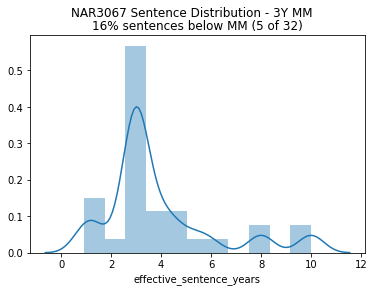

In [35]:
offense_code = 'NAR3067'
mm_years = 3
group = prison_df[prison_df['offense_code'] == offense_code]
percent_below = 100 * sum(group['effective_sentence_years'] < mm_years)/len(group)
print(f"{percent_below}% below the Manditory Minimum")
ax = sns.distplot(group['effective_sentence_years'])
title = plt.suptitle(f'{offense_code} Sentence Distribution - {mm_years}Y MM')
plt.title(f"{percent_below:.0f}% sentences below MM ({sum(group['effective_sentence_years'] < mm_years)} of {len(group)})")
ymin, ymax = ax.get_ylim()
#plt.vlines(x=mm_years, ymin=ymin, ymax=ymax, color='red')

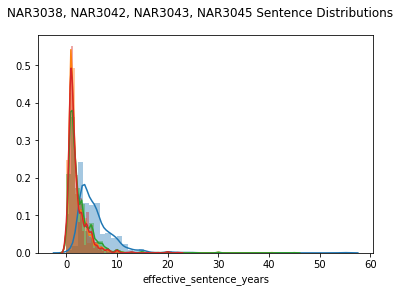

In [36]:
offense_codes = ['NAR3038', 
                 'NAR3042', 
                 'NAR3043', 
                 'NAR3045'
                ]
ax=None
for code in offense_codes: 
    group = prison_df[prison_df['offense_code'] == code]
    ax = sns.distplot(group['effective_sentence_years'], ax=ax)
title = plt.suptitle(f"{', '.join(offense_codes)} Sentence Distributions")
#plt.title(f"{percent_below:.0f}% sentences below MM ({sum(group['effective_sentence_years'] < mm_years)} of {len(group)})")
ymin, ymax = ax.get_ylim()
#plt.vlines(x=mm_years, ymin=ymin, ymax=ymax, color='red')

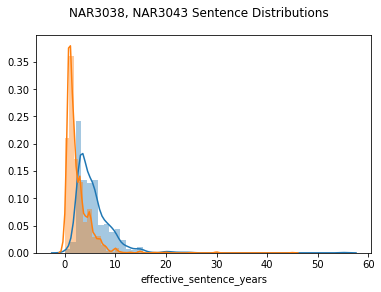

In [37]:
offense_codes = ['NAR3038', 
                 #'NAR3042', 
                 'NAR3043', 
                 #'NAR3045'
                ]
ax=None
for code in offense_codes: 
    group = prison_df[prison_df['offense_code'] == code]
    ax = sns.distplot(group['effective_sentence_years'], ax=ax)
title = plt.suptitle(f"{', '.join(offense_codes)} Sentence Distributions")
#plt.title(f"{percent_below:.0f}% sentences below MM ({sum(group['effective_sentence_years'] < mm_years)} of {len(group)})")
ymin, ymax = ax.get_ylim()
#plt.vlines(x=mm_years, ymin=ymin, ymax=ymax, color='red')

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

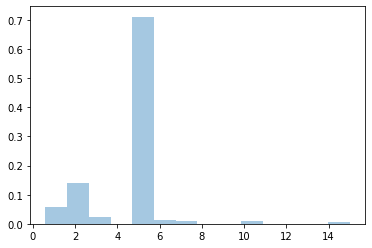

In [38]:
offense_codes = ['WPN5296', 
                 'WPN5297', 
                 #'WPN5291', 
                 #'WPN5298'
                ]
ax=None
for code in offense_codes: 
    group = prison_df[prison_df['offense_code'] == code]
    ax = sns.distplot(group['effective_sentence_years'], ax=ax)
title = plt.suptitle(f"{', '.join(offense_codes)} Sentence Distributions")

group_2 = prison_df[prison_df['offense_code'].isin(['WPN5291', 'WPN5298'])]
ax = sns.distplot(group_2['effective_sentence_years'], ax=ax)
#plt.title(f"{percent_below:.0f}% sentences below MM ({sum(group['effective_sentence_years'] < mm_years)} of {len(group)})")
ymin, ymax = ax.get_ylim()
#plt.vlines(x=mm_years, ymin=ymin, ymax=ymax, color='red')

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

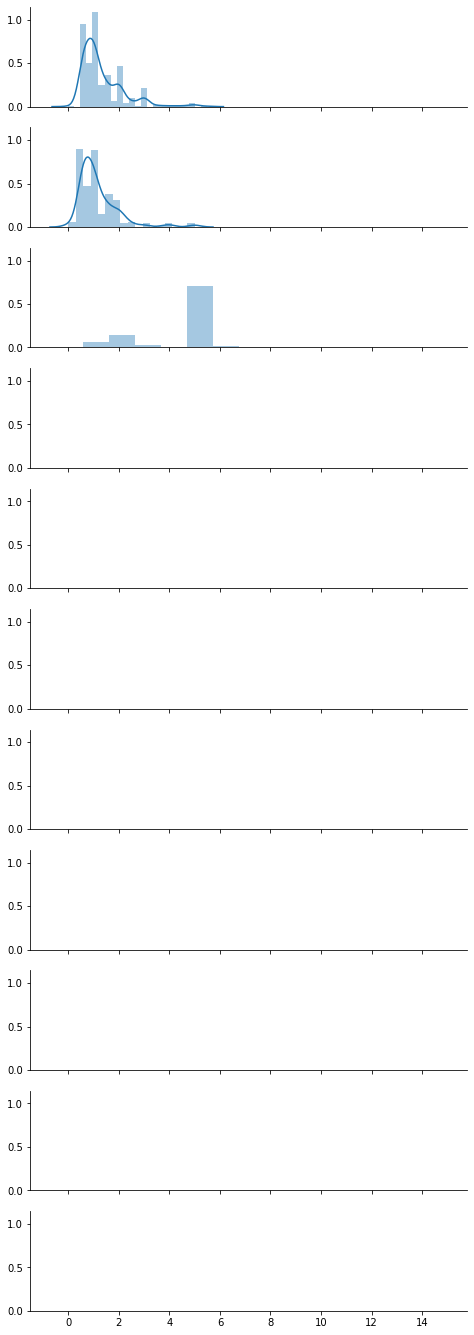

In [39]:
weapons_prison_sentences = prison_df[(prison_df['offense_group'] == 'WEAPONS/FIREARMS')
                                    & (prison_df['offense_code'] != 'WPN5297')]

ordered_codes = weapons_prison_sentences['offense_code'].value_counts().index
g = sns.FacetGrid(weapons_prison_sentences, row="offense_code", row_order=ordered_codes,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "effective_sentence_years")

In [ ]:
offense_code = 'WPN5296'
mm_years = 5
group = prison_df[prison_df['offense_code'] == offense_code]
percent_below = 100 * sum(group['effective_sentence_years'] < mm_years)/len(group)
print(f"{percent_below}% below the Manditory Minimum")
ax = sns.distplot(group['effective_sentence_years'])
title = plt.suptitle(f'{offense_code} Sentence Distribution - {mm_years}Y MM')
plt.title(f"{percent_below:.0f}% sentences below MM ({sum(group['effective_sentence_years'] < mm_years)} of {len(group)})")
ymin, ymax = ax.get_ylim()
#plt.vlines(x=mm_years, ymin=ymin, ymax=ymax, color='red')

In [ ]:
offense_code = 'WPN5297'
mm_years = 2
group = prison_df[prison_df['offense_code'] == offense_code]
percent_below = 100 * sum(group['effective_sentence_years'] < mm_years)/len(group)
print(f"{percent_below}% below the Manditory Minimum")
ax = sns.distplot(group['effective_sentence_years'])
title = plt.suptitle(f'{offense_code} Sentence Distribution - {mm_years}Y MM')
plt.title(f"{percent_below:.0f}% sentences below MM ({sum(group['effective_sentence_years'] < mm_years)} of {len(group)})")
ymin, ymax = ax.get_ylim()
#plt.vlines(x=mm_years, ymin=ymin, ymax=ymax, color='red')

In [ ]:
agg_results = prison_df.groupby(['offense_group', 'offense_code'], as_index=False
                 ).agg({'off1_vcc': 'count', 'effective_sentence_years': ['min', 'max']}
                      ).sort_values(by=('effective_sentence_years', 'max'))


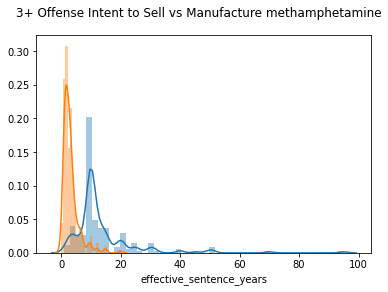

In [40]:
offense_codes = ['NAR3087', 
                 #'NAR3042', 
                 'NAR3131', 
                 #'NAR3045'
                ]
ax=None
for code in offense_codes: 
    group = prison_df[prison_df['offense_code'] == code]
    ax = sns.distplot(group['effective_sentence_years'], ax=ax)
title = plt.suptitle(f"3+ Offense Intent to Sell vs Manufacture methamphetamine")
#plt.title(f"{percent_below:.0f}% sentences below MM ({sum(group['effective_sentence_years'] < mm_years)} of {len(group)})")
ymin, ymax = ax.get_ylim()
#plt.vlines(x=mm_years, ymin=ymin, ymax=ymax, color='red')

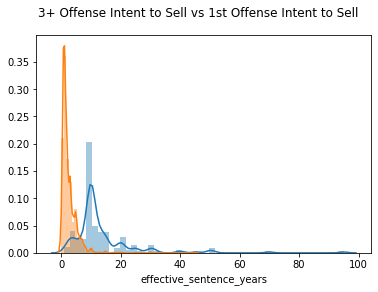

In [41]:
offense_codes = ['NAR3087', 
                 #'NAR3042', 
                 'NAR3043', 
                 #'NAR3045'
                ]
ax=None
for code in offense_codes: 
    group = prison_df[prison_df['offense_code'] == code]
    ax = sns.distplot(group['effective_sentence_years'], ax=ax)
title = plt.suptitle(f"3+ Offense Intent to Sell vs 1st Offense Intent to Sell")
#plt.title(f"{percent_below:.0f}% sentences below MM ({sum(group['effective_sentence_years'] < mm_years)} of {len(group)})")
ymin, ymax = ax.get_ylim()
#plt.vlines(x=mm_years, ymin=ymin, ymax=ymax, color='red')

In [42]:
prison_df[prison_df['effective_sentence_years'] > 10]['offense_group'].value_counts(dropna=False)

MURDER                    420
RAPE                      317
ROBBERY                   292
DRUG/SCHEDULE I/II        185
ASSAULT                   180
OTHER SEXUAL ASSAULT       85
OBSCENITY                  79
KIDNAPPING                 40
BURGLARY/DWELLING          40
MISC/PERSON & PROPERTY      9
LARCENY                     8
BURGLARY/OTHER              6
DRUG OTHER                  5
FRAUD                       3
TRAFFIC FELONY              3
WEAPONS/FIREARMS            1
Name: offense_group, dtype: int64

In [43]:
len(prison_df[prison_df['effective_sentence_years'] > 10])

1673

prison    202
jail        3
Name: sentence_type, dtype: int64
23.90% below the Manditory Minimum
Mean sentence length: 4.37
Median sentence length: 5.00


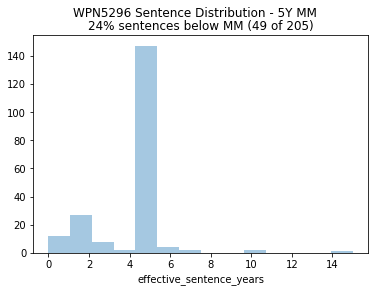

In [44]:
offense_code = 'WPN5296'
mm_years = 5
#group = prison_df[prison_df['offense_code'] == offense_code]
group = va_sentence_df[(va_sentence_df['offense_code'] == offense_code) 
                       & (va_sentence_df['sentence_type'] != 'probation')
                      ]
print(group['sentence_type'].value_counts(dropna=False))
percent_below = 100 * sum(group['effective_sentence_years'] < mm_years)/len(group)
print(f"{percent_below:.2f}% below the Manditory Minimum")
print(f"Mean sentence length: {group['effective_sentence_years'].mean():.2f}")
print(f"Median sentence length: {group['effective_sentence_years'].median():.2f}")
ax = sns.distplot(group['effective_sentence_years'], kde=False)
title = plt.suptitle(f'{offense_code} Sentence Distribution - {mm_years}Y MM')
plt.title(f"{percent_below:.0f}% sentences below MM ({sum(group['effective_sentence_years'] < mm_years)} of {len(group)})")
ymin, ymax = ax.get_ylim()
#plt.vlines(x=mm_years, ymin=ymin, ymax=ymax, color='red')

In [45]:
va_sentence_df[va_sentence_df['sentence_type'] != 'probation']['effective_sentence_years'].describe()

count    55940.000000
mean         2.064846
std          5.745888
min          0.000000
25%          0.250000
50%          0.833333
75%          2.000000
max        421.000000
Name: effective_sentence_years, dtype: float64

In [46]:
va_sentence_df[va_sentence_df['sentence_type'] != 'probation']['effective_sentence_months'].describe()

count    55940.000000
mean        24.778152
std         68.950661
min          0.000000
25%          3.000000
50%         10.000000
75%         24.000000
max       5052.000000
Name: effective_sentence_months, dtype: float64

In [47]:
va_sentence_df

,offense_group,offense_code,off1_vcc,judge_id,year,effective_sentence_months,effective_sentence_years,life_sentence,offense_date,compartment,sentence_type,effective_sentence_years_clipped
0,ASSAULT,ASL1316,ASL1316F6,0,2018.0,18.0,1.500000,0.0,5/20/2017,pretrial,prison,1.500000
1,ASSAULT,ASL1316,ASL1316F6,0,2019.0,10.0,0.833333,0.0,4/25/2018,pretrial,prison,0.833333
2,ASSAULT,ASL1316,ASL1316F6,10DB,2018.0,0.0,0.000000,0.0,11/11/2017,pretrial,probation,0.000000
3,ASSAULT,ASL1316,ASL1316F6,10DB,2017.0,0.0,0.000000,0.0,6/8/2015,pretrial,jail,0.000000
4,ASSAULT,ASL1316,ASL1316F6,10DB,2017.0,7.0,0.583333,0.0,12/25/2016,pretrial,prison,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...
74313,WEAPONS/FIREARMS,WPN5298,WPN5298F6,9MM,2018.0,8.0,0.666667,0.0,6/1/2017,pretrial,prison,0.666667
74314,WEAPONS/FIREARMS,WPN5298,WPN5298F6,9MM,2018.0,13.0,1.083333,0.0,6/27/2017,pretrial,prison,1.083333
74315,WEAPONS/FIREARMS,WPN5298,WPN5298F6,9MM,2019.0,7.0,0.583333,0.0,11/30/2017,pretrial,prison,0.583333
74316,WEAPONS/FIREARMS,WPN5298,WPN5298F6,9TH,2018.0,5.0,0.416667,0.0,12/26/2016,pretrial,jail,0.416667


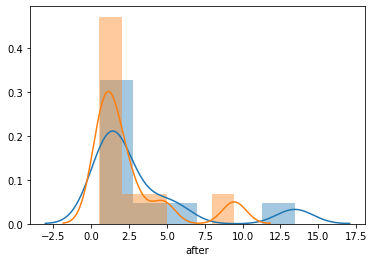

In [63]:
affected_crimes = {
    'ASL1342': 0.5, 
    'NAR3038': 3, 
    'NAR3087': 10, 
    'DWI5406': 1, 
    'DWI5449': 0.25, 
    'DWI5450': 0.5, 
    'LIC6834': 1, 
    'LIC6860': 1, 
    'WPN5296': 5,   
    'WPN5297': 2
}

policy_df = pd.DataFrame(0, columns=['before', 'after'], index=affected_crimes.keys())

for crime, mm in affected_crimes.items():
    crime_data = va_sentence_df[va_sentence_df.offense_code == crime]
    mm_effect = len(crime_data[crime_data.effective_sentence_years == mm]) / len(crime_data)
    stdev = crime_data.effective_sentence_years.std()
    
    policy_df.loc[crime, 'before'] = crime_data.effective_sentence_years.mean()
    policy_df.loc[crime, 'after'] = crime_data.effective_sentence_years.mean() - mm_effect * stdev
    
    
ax=None
for tag in ['before', 'after']: 
    
    ax = sns.distplot(policy_df[tag], ax=ax)


In [54]:
policy_df

,before,after
ASL1342,1.12447,0.963767
NAR3038,5.64122,4.7408
NAR3087,13.4467,9.44219
DWI5406,1.51834,1.18255
DWI5449,0.588288,0.526032
DWI5450,0.814926,0.598222
LIC6834,1.39167,1.03462
LIC6860,1.97978,1.94311
WPN5296,4.1107,2.79927
WPN5297,2.1976,1.64688


In [68]:
test = pd.Series()
test.append(pd.Series([i for i in range(10)]))
test

/Users/pacopoler/.local/share/virtualenvs/recidiviz-research-LWZgHH0n/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


Series([], dtype: float64)

In [69]:
test.std

<bound method Series.std of Series([], dtype: float64)>

In [70]:
test.std()

nan